In [3]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
# Вспомогательные функции
def count_percent(data, col, is_series=False):
    if is_series:
        filled = data.fillna('Unknown')
    else:
        if col is None:
            raise ValueError("Укажите имя столбца col для DataFrame.")
        filled = data[col].fillna('Unknown')
    counts = filled.value_counts()
    perc = (counts / counts.sum() * 100).round(1)
    return pd.DataFrame({'Количество': counts, 'Процент, %': perc})

In [263]:
# График count plot
def plot_count(data, column, title=None, hue=None, xlabel=None, ylabel='Количество', order=None, xlabelrotation=False, legend=False):
    if hue is None:
        hue = column
    if title is None:
        title = f'Распределение {column}'
    if xlabel is None:
        xlabel = column
    sns.countplot(x=column, data=data, order=order, hue=hue)
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    if xlabelrotation:
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [264]:
# Построение графика для колонок с множественной классификацией.
def plot_top_n_from_list(data, column, title=None, top_n=30, xlabel='Количество', ylabel=None):
    list_col = data[column].dropna().str.split(', ')
    all_items = list_col.explode()
    counts = all_items.value_counts()
    
    top_items = counts[:top_n]
    
    sns.barplot(x=top_items.values, y=top_items.index)
    if title is None:
        title = f'Top-{top_n} {col}'
    plt.title(title)
    plt.xlabel(xlabel)
    if ylabel is None:
        ylabel = col
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

In [265]:
# Подсчет количества и процентного соотношения элементов в колонке с множественной классификацией.
def count_percent_multiclass(data, column, top_n=None):
    all_items = data[column].dropna().str.split(', ').explode()
    counts = all_items.value_counts()
    if top_n:
        counts = counts[:top_n]
    perc = (counts / counts.sum() * 100).round(1)
    return pd.DataFrame({'Количество': counts, 'Процент, %': perc})

# Первичный разведочный анализ данных (EDA)
## Общая информация по данным

In [4]:
# Загрузка данных
data_train = pd.read_csv('../data/interactions_train.csv', sep=',')
data_items = pd.read_csv('../data/items.csv', sep=',')
data_users = pd.read_csv('../data/users.csv', sep=',')
data_test = pd.read_csv('../data/interactions_public_test.csv', sep=',')

In [5]:
# Объединение файлов
data = (
    data_train
    .merge(data_users, on='user_id', how='left')
    .merge(data_items, on='item_id', how='left')
)

In [268]:
data.head().T

,0,1,2,3,4
user_id,3,3,3,3,4
item_id,10139,7204,12928,3897,811
last_watch_dt,2021-04-25,2021-07-17,2021-08-17,2021-08-17,2021-06-12
total_dur,103.00000,28.00000,845.00000,901.00000,6191.00000
watched_pct,2.00000,1.00000,15.00000,15.00000,100.00000
age,age_35_44,age_35_44,age_35_44,age_35_44,NaN
income,income_20_40,income_20_40,income_20_40,income_20_40,NaN
sex,Ж,Ж,Ж,Ж,NaN
kids_flg,1.00000,1.00000,1.00000,1.00000,NaN
content_type,film,film,film,film,film


In [269]:
data.shape

(922967, 21)

Размерность около 923 тысяч строк, 21 признак.

In [270]:
# Вывод информации о типах признаков
data.dtypes

user_id            int64
item_id            int64
last_watch_dt     object
total_dur        float64
watched_pct      float64
age               object
income            object
sex               object
kids_flg         float64
content_type      object
title             object
title_orig        object
release_year     float64
genres            object
countries         object
for_kids         float64
age_rating       float64
studios           object
directors         object
actors            object
keywords          object
dtype: object

In [271]:
# Проверка на пустые значения
data.isnull().sum()

user_id               0
item_id               0
last_watch_dt         0
total_dur             1
watched_pct         185
age              178846
income           178537
sex              178941
kids_flg         168510
content_type          0
title                 0
title_orig        63785
release_year         66
genres                0
countries            39
for_kids         902894
age_rating            0
studios          915248
directors          8651
actors            27356
keywords          38082
dtype: int64

In [272]:
# Проверка на дубликаты
data.duplicated().sum()

np.int64(0)

In [273]:
# Просмотр уникальных значений
data.nunique()

user_id          284999
item_id           11856
last_watch_dt       163
total_dur         60075
watched_pct         101
age                   6
income                6
sex                   2
kids_flg              2
content_type          2
title             11403
title_orig         8616
release_year        103
genres             2247
countries           631
for_kids              2
age_rating            6
studios              36
directors          6498
actors             9897
keywords          11408
dtype: int64

## 1. Признаки пользователей
- user_id - уникальный идентификатор пользователя
- age - возраст пользователя
- income - доход
- sex - пол
- kids_flg - флаг детского профиля

### Распределение пользователей по возрасту
**Цель:** Проанализировать распределение пользователей по возрасту, выявление преобладающих возрастных групп.

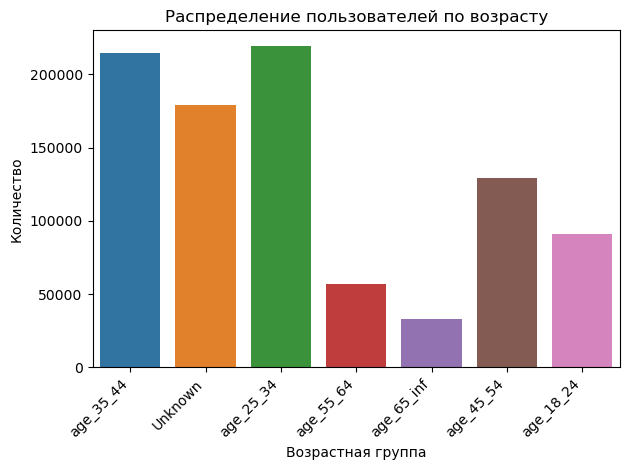

In [274]:
data['age'] = data['age'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'age', title='Распределение пользователей по возрасту', xlabel='Возрастная группа', xlabelrotation=True)

In [275]:
age_df = count_percent(data, 'age')
age_df

,Количество,"Процент, %"
age,,
age_25_34,219175,23.70000
age_35_44,214491,23.20000
Unknown,178846,19.40000
age_45_54,129407,14.00000
age_18_24,91102,9.90000
age_55_64,56934,6.20000
age_65_inf,33012,3.60000


***Вывод:*** 
- Наибольшие группы пользователей от **25 до 34 - 29.5%** и от **35 до 44 - 28.8%**.
- Наименьшие группы от **55 до 64 лет - 7.7%** и **выше 65 лет - 4.4%**.
- Пропущено около **20%** возрастов пользователей.

### Распределение пользователей по полу
**Цель:** Проанализировать распределение пользователей по полу, выявление преобладающего по количеству пола.

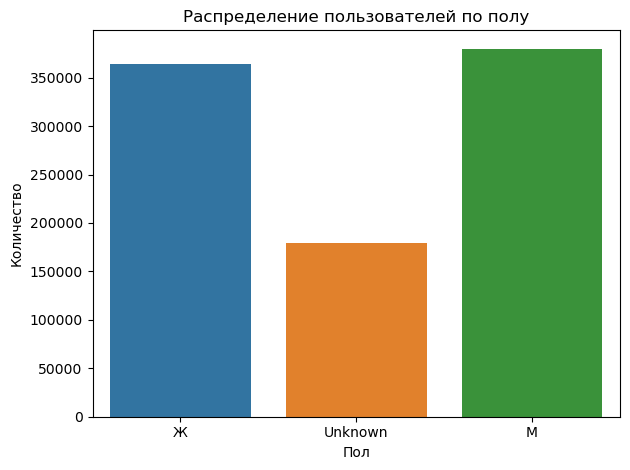

In [276]:
data['sex'] = data['sex'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'sex', title='Распределение пользователей по полу', xlabel='Пол')

In [277]:
# Подсчет процентного соотношения пользователей в зависимости от пола.
sex_df = count_percent(data, 'sex')
sex_df

,Количество,"Процент, %"
sex,,
М,379890,41.20000
Ж,364136,39.50000
Unknown,178941,19.40000


***Вывод:*** 
- В целом пользователи распределены по ровну по полу, **41.2% мужчины** и **39.5% женщины** соответственно.
- Около **19.4%** данных о поле пользователей неизвестно.

### Соотношение детей.
**Цель:** Выяснить процентное соотношение пользователей с детским профилем к общему числу пользователей.

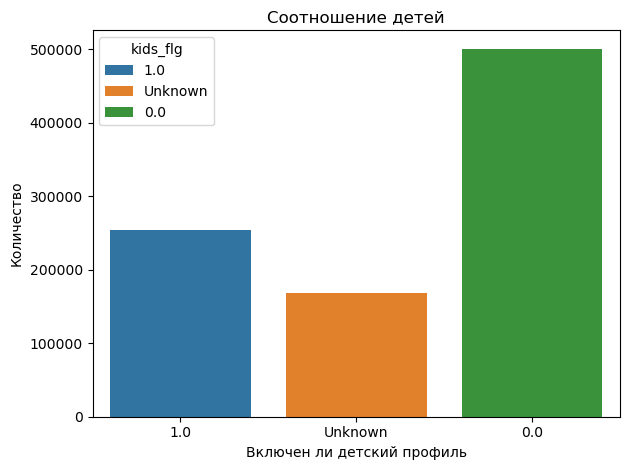

In [278]:
data['kids_flg'] = data['kids_flg'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'kids_flg', title='Соотношение детей', xlabel='Включен ли детский профиль', xlabelrotation=False)

In [279]:
# Подсчет процентного соотношения пользователей с детским профилем к общему числу пользователей.
kids_df = count_percent(data, 'kids_flg')
kids_df

,Количество,"Процент, %"
kids_flg,,
0.00000,500469,54.20000
1.00000,253988,27.50000
Unknown,168510,18.30000


***Вывод:*** 
- У **27.5%** пользователей включен детский профиль.
- Для **18.3%** данные неизвестны.

### Распределение пользователей в зависимости от дохода.
**Цель:** Выяснить соотношение пользователей с различным уровнем дохода.

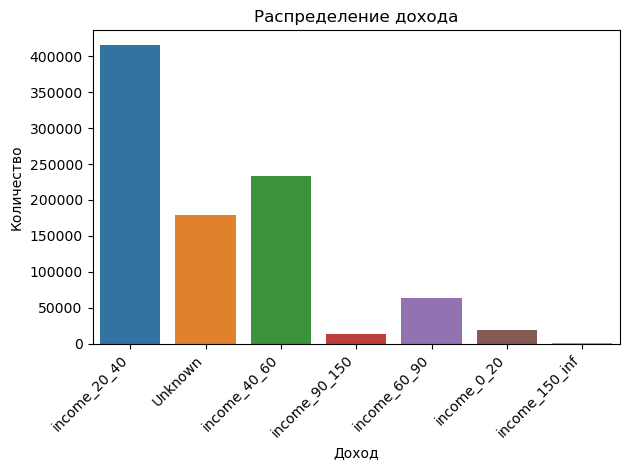

In [280]:
data['income'] = data['income'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'income', title='Распределение дохода', xlabel='Доход', xlabelrotation=True)

In [281]:
# Подсчет процентного соотношения пользователей с различным уровнем дохода.
income_df = count_percent(data, 'income')
income_df

,Количество,"Процент, %"
income,,
income_20_40,415339,45.00000
income_40_60,232944,25.20000
Unknown,178537,19.30000
income_60_90,62827,6.80000
income_0_20,19529,2.10000
income_90_150,12842,1.40000
income_150_inf,949,0.10000


***Вывод:*** 
- Наибольшее кол-во пользователей имеют доход **от 20 до 40** тысяч в месяц, что равняется **45%**.
- Минимальное кол-во пользователей обладают доходом от **90 до 150 (1.4%)** и выше **150 (0.1%)** тысяч соответственно.
- Для **19.3%** данные неизвестны.

## 2. Признаки видеоконтента
- item_id - уникальный идентификатор видео
- content_type - тип контента
- title - название видео
- title_orig - ссылка на оригинальное видео
- release_year - год создания видео
- genres - жанры
- countries - страна(ы), где создали видео
- for_kids - детский контент
- age_rating - возрастной рейтинг
- studios - студия, где снималось видео
- directors - режиссер видео
- actors - актеры
- keywords - ключевые слова

### Распределение видео в зависимости от типа контента.
**Цель:** Выяснить распределение видео по типу.

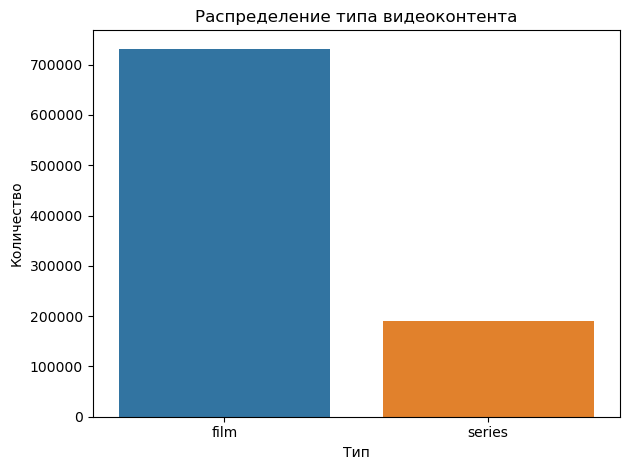

In [282]:
plot_count(data, 'content_type', title='Распределение типа видеоконтента', xlabel='Тип')

In [283]:
# Подсчет процентного соотношения типов контента.
income_df = count_percent(data, 'content_type')
income_df

,Количество,"Процент, %"
content_type,,
film,731723,79.30000
series,191244,20.70000


***Вывод:*** 
- **79.3%** контента это фильм.
- **20.7%** контента сериал.

### Количество видео по годам выпуска (последние 30 лет)
**Цель:** Выяснить распределение видеоконтента за последние 30 лет.

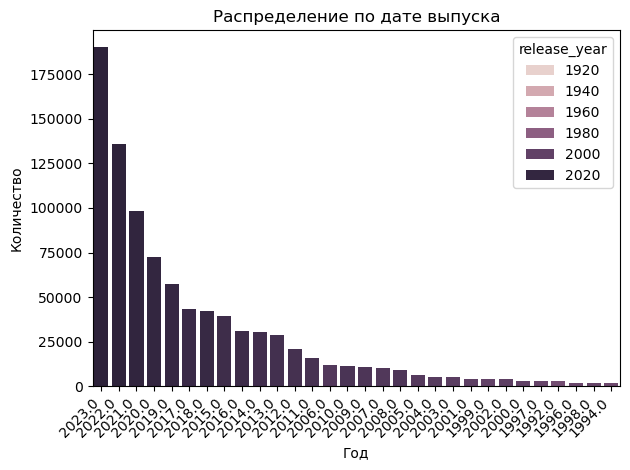

In [284]:
plot_count(data, 'release_year', title='Распределение по дате выпуска', xlabel='Год', xlabelrotation=True, order=data['release_year'].value_counts().index[:30])

In [285]:
# Подсчет процентного соотношения типов контента.
release_df = count_percent(data, 'release_year')
release_df.head(30)

,Количество,"Процент, %"
release_year,,
2023.00000,190074,20.60000
2022.00000,135706,14.70000
2021.00000,98511,10.70000
2020.00000,72400,7.80000
2019.00000,57234,6.20000
2017.00000,43188,4.70000
2018.00000,42056,4.60000
2015.00000,39166,4.20000
2016.00000,30827,3.30000


***Вывод:***
- Наибольшее количество контента приходится на **2023 год (20.6%)**, далее идут **2022 (14.7%)** и **2021 (10.7%)**.
- Наблюдается явная тенденция к уменьшению числа релизов с уходом в прошлое, что отражает рост активности последних лет и сокращение числа старого контента в базе.

### Кол-во контента по жанрам.
**Цель:** Выяснить преобладающие жанры контента на сервисе.

In [286]:
# Кол-во уникальных жанров
data.genres.nunique()

2247

Имея ввиду что кол-во жанров велико - **2247**, принято решение рассмотреть **топ 30 самых популярных жанров**.

Перед этим необходимо разделить жанры.

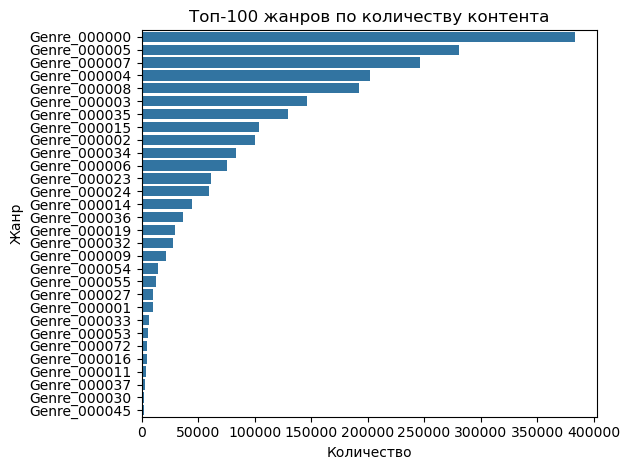

In [287]:
plot_top_n_from_list(data, 'genres', title='Топ-100 жанров по количеству контента', top_n=30, ylabel='Жанр')

In [288]:
genres_df = count_percent_multiclass(data, 'genres')
top_30 = genres_df.head(30)
top30_total_perc = top_30['Процент, %'].sum()
f'Топ-30 жанров покрывают {top30_total_perc:.1f}% всего контента'

'Топ-30 жанров покрывают 99.3% всего контента'

**Вывод:** Топ‑30 жанров охватывают **99.3%** всего контента сервиса. 
Это оправдывает сокращение исходного множества жанров до 30 для дальнейшего анализа и визуализации.

### Распределение контента по странам.
**Цель:** Выяснить преобладающие страны авторы контента на сервисе.

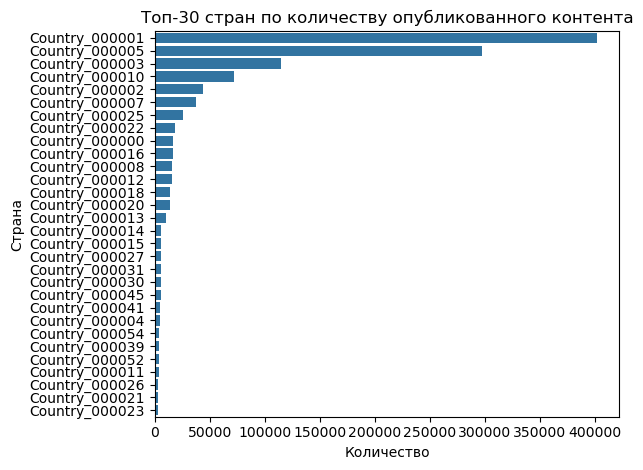

In [289]:
plot_top_n_from_list(data, 'countries', title='Топ-30 стран по количеству опубликованного контента', top_n=30, ylabel='Страна')

In [290]:
countries_df = count_percent_multiclass(data, 'genres')
top_30_countries = countries_df.head(30)
top_30_countries_total_perc = top_30_countries['Процент, %'].sum()
f'Топ-30 стран публикуют {top_30_countries_total_perc:.1f}% от всего контента'

'Топ-30 стран публикуют 99.3% от всего контента'

**Вывод:** Топ‑30 стран охватывают **99.3%** всего контента сервиса. Мы можем рассматривать их как основные страны для дальнейшего анализа и обучения моделей.

### Распределение ключевых слов по контенту.
**Цель:** Выяснить самые частовстречающиеся ключевые слова под контентом.

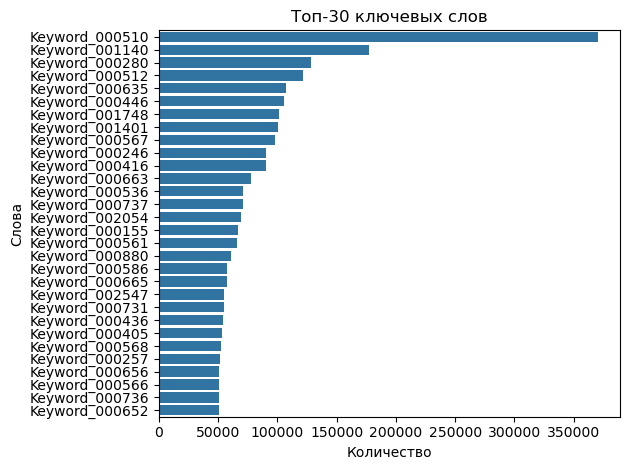

In [291]:
plot_top_n_from_list(data, 'keywords', title='Топ-30 ключевых слов', top_n=30, ylabel='Слова')

In [292]:
keywords_df = count_percent_multiclass(data, 'keywords')
n = 300
top_n_keywords = keywords_df.head(n)
top_n_keywords_total_perc = top_n_keywords['Процент, %'].sum()
f'Топ-{n} ключевых слов которые встречаются в {top_n_keywords_total_perc}% всего контента'

'Топ-300 ключевых слов которые встречаются в 32.099999999999994% всего контента'

In [293]:
# Кол-во уникальных слов
f"Количество уникальных ключевых слов: {data.keywords.nunique()}"

'Количество уникальных ключевых слов: 11408'

In [294]:
# Количество пустых значений
f"Количество пустых ключевых слов: {int(data.keywords.isnull().sum())}"

'Количество пустых ключевых слов: 38082'

**Вывод:** Ключевые слова характеристика, которая обладает большим количество пропусков - **68%**. Оставшиеся **32%** охватывает 300 ключевых слов, ввиду этого можно исключить этот признак из анализ и заменить его числовым признаком: **кол-во ключевых слов на контенте**.

### Количество детского контента.
**Цель:** Выяснить соотношение обычного и детского контента.

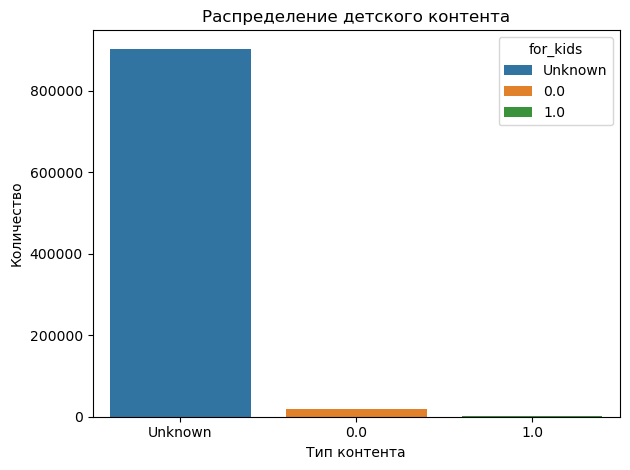

In [295]:
data['for_kids'] = data['for_kids'].fillna('Unknown')  # Заполнение пропусков третьей группой.
plot_count(data, 'for_kids', title='Распределение детского контента', xlabel='Тип контента')

In [296]:
# Подсчет процентного соотношения типов контента.
for_kids_df = count_percent(data, 'for_kids')
for_kids_df

,Количество,"Процент, %"
for_kids,,
Unknown,902894,97.80000
0.00000,18981,2.10000
1.00000,1092,0.10000


**Вывод:**
- Большинство записей (**97.8%**) имеют пропуски.
- Реальные отметки почти отстутствуют, всего **2.2%**.
- Признак неинформативен, его следует исключить, либо использовать как бинарный (**0 - не детский, 1 - детский**), либо заполнить исходя из признака **age_rating**

### Количество контента по возрастным категориям.
**Цель:** Выяснить какая возрастная категория преобладает.

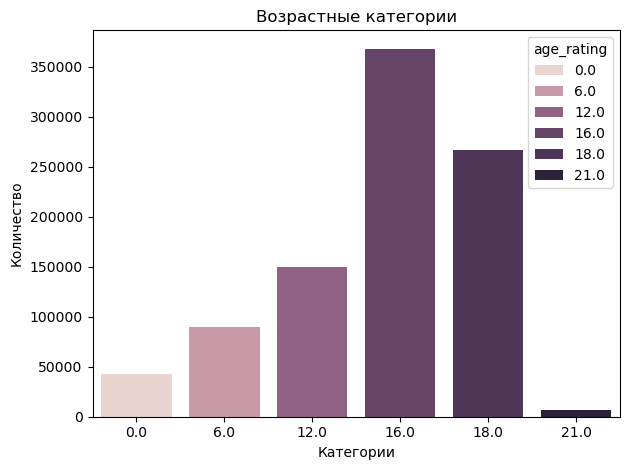

In [297]:
plot_count(data, 'age_rating', title='Возрастные категории', xlabel='Категории')

In [298]:
# Подсчет процентного соотношения возрастных категорий.
age_rating_df = count_percent(data, 'age_rating')
age_rating_df

,Количество,"Процент, %"
age_rating,,
16.00000,367848,39.90000
18.00000,266340,28.90000
12.00000,149782,16.20000
6.00000,89813,9.70000
0.00000,42346,4.60000
21.00000,6838,0.70000


**Вывод:**
- Преобладающая возрастная категория - 16 лет (**39.9%**).
- Вторая и третья категории - это 18 лет (**28.9%**) и 12 лет (**16.2%**)
- На эти три категории приходится **85%** всего контента.
- Контент $\leq 12$ лет можно считать детским, на него приходится **21%** всего контента.

## 3. Взаимодействие пользователей с контентом
- user_id - уникальный идентификатор пользователя;
- item_id - уникальный идентификатор видео;
- last_watch_dt - последнее время просмотра видео;
- total_dur - общая продолжительность видео;
- watched_pct - процент просмотра видео пользователем.

In [299]:
# Посмотрим данные в этих столбцах
cols = ['last_watch_dt', 'total_dur', 'watched_pct']
data[cols].head()

,last_watch_dt,total_dur,watched_pct
0,2021-04-25,103.00000,2.00000
1,2021-07-17,28.00000,1.00000
2,2021-08-17,845.00000,15.00000
3,2021-08-17,901.00000,15.00000
4,2021-06-12,6191.00000,100.00000


In [300]:
# Типы данных интересующих столбцов
data[cols].dtypes

last_watch_dt     object
total_dur        float64
watched_pct      float64
dtype: object

In [301]:
# Приведем дату из object -> datetime
data['last_watch_dt'] = pd.to_datetime(data['last_watch_dt'])
data['last_watch_dt'].head()

0   2021-04-25
1   2021-07-17
2   2021-08-17
3   2021-08-17
4   2021-06-12
Name: last_watch_dt, dtype: datetime64[ns]

In [302]:
# Переведем формат из datetime -> timestamp
data['last_watch_timestamp'] = data['last_watch_dt'].astype(int)
data['last_watch_timestamp'] = data['last_watch_timestamp'].div(10**9)
data['last_watch_timestamp'].head()

0   1619308800.00000
1   1626480000.00000
2   1629158400.00000
3   1629158400.00000
4   1623456000.00000
Name: last_watch_timestamp, dtype: float64

## Распределение продолжительности видеоконтента
**Цель:** Выяснить распределение продолжительности видеоконтента на сервисе.

In [314]:
# Сделаем колонки в которых установим формат продолжительности в минутах и часах (для простоты изучения)
data["total_dur_min"] = data["total_dur"] / 60
data["total_dur_hr"] = data["total_dur"] / 3600

In [304]:
# Посмотрим числовые характеристики продолжительности
duration_times = data[["total_dur", "total_dur_min", "total_dur_hr"]]
duration_times.describe()

,total_dur,total_dur_min,total_dur_hr
count,922966.00000,922966.00000,922966.00000
mean,7807.80238,130.13004,2.16883
std,30460.31406,507.67190,8.46120
min,1.00000,0.01667,0.00028
25%,431.00000,7.18333,0.11972
50%,3341.00000,55.68333,0.92806
75%,7147.00000,119.11667,1.98528
max,6147245.00000,102454.08333,1707.56806


Изучив характеристики total_dur, можно сделать выводы:
- Не следует рассматривать среднее значение, ввиду экстрмальных значений max (**1707 часов**).
- Медиана - **55 минут**, 75% всего видеоконтента вмещаются в диапазон от **0 до 120 минут**.

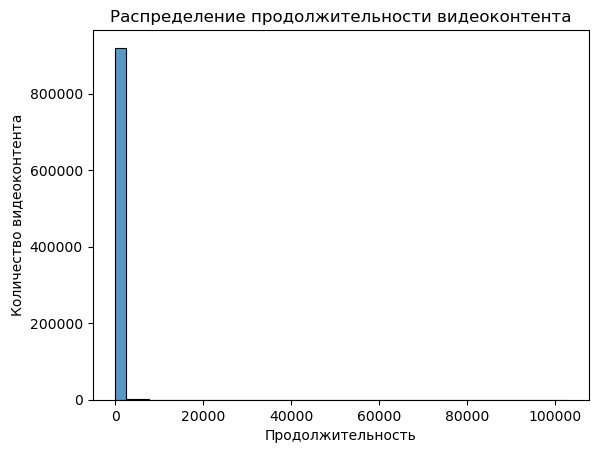

In [308]:
# Построим распределение после фильтрации признака total_dur
sns.histplot(data.total_dur_min, bins=40)
plt.title('Распределение продолжительности видеоконтента')
plt.xlabel('Продолжительность')
plt.ylabel('Количество видеоконтента')
plt.show()

**Вывод**: 
- Из графика видно что он абсолютно неинформативен, необходимо выяснить какой процент данных заставляет распределение настолько сильно смещаться.

### Определим верхний порог продолжительности видеоконтента, в котором поместится около 95% всего контента.

In [238]:
total_videos = data.total_dur_min.shape[0] # Общее кол-во видео
dur = 450
videos_gt_dur = data.query(f"total_dur_min > {dur}").shape[0]
vid_gt_dur_perc = videos_gt_dur / total_videos
f"Процент видеоконтента продолжительностью более {dur} составляет {round(vid_gt_dur_perc * 100, 2)}%"

'Процент видеоконтента продолжительностью более 450 составляет 5.33%'

**Вывод:**
- Продолжительность видеоконтента в диапазоне от **0 до 450 минут** составляет около **95%** всего медиаконтента.

In [309]:
filtered_data = data.query("total_dur_min <= 450").copy()
f"Размер набора после фильтрации: {data.shape[0]} записей"

'Размер набора после фильтрации: 922967 записей'

In [312]:
duration_times = filtered_data[["total_dur", "total_dur_min", "total_dur_hr"]]
duration_times.describe()

,total_dur,total_dur_min,total_dur_hr
count,873810.00000,873810.00000,873810.00000
mean,4221.01918,70.35032,1.17251
std,4713.70383,78.56173,1.30936
min,1.00000,0.01667,0.00028
25%,365.00000,6.08333,0.10139
50%,2753.00000,45.88333,0.76472
75%,6645.00000,110.75000,1.84583
max,27000.00000,450.00000,7.50000


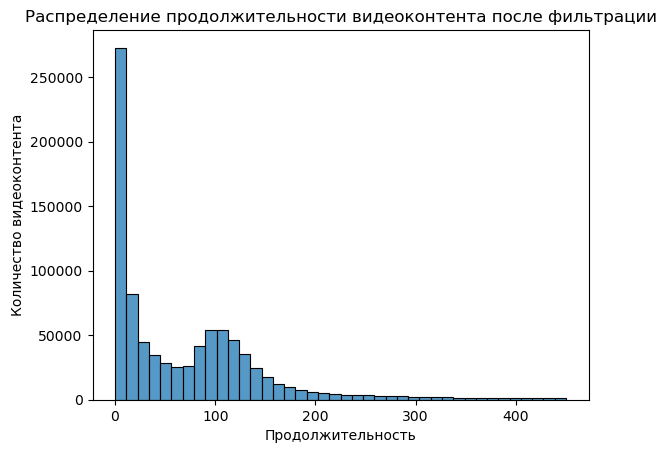

In [313]:
# Построим распределение после фильтрации признака total_dur
sns.histplot(filtered_data.total_dur_min, bins=40)
plt.title('Распределение продолжительности видеоконтента после фильтрации')
plt.xlabel('Продолжительность')
plt.ylabel('Количество видеоконтента')
plt.show()

**После фильтрации признака total_dur (удаления 5% экстремальных значений):**
- Медиана сместилась с **55 до 45** минут.
- Среднее изменилось со **130 до 70** минут.
- Стандартное отклонение с **507 до 78** -> снижение разброса + стабилизация.

**Но, такое радикальное удаление 5% значений может негативно сказаться на интерпретации, из-за удаления полезных данных**.

Исходя из графика после фильтрации можно заметить что распределение близко к **логнормальному**, поэтому можно прибегнуть к логарифмированию, которое поможет сохранить полезные данные.

In [315]:
# Прологарифмировуем признак total_dur
data['total_dur_log'] = np.log1p(data['total_dur'])

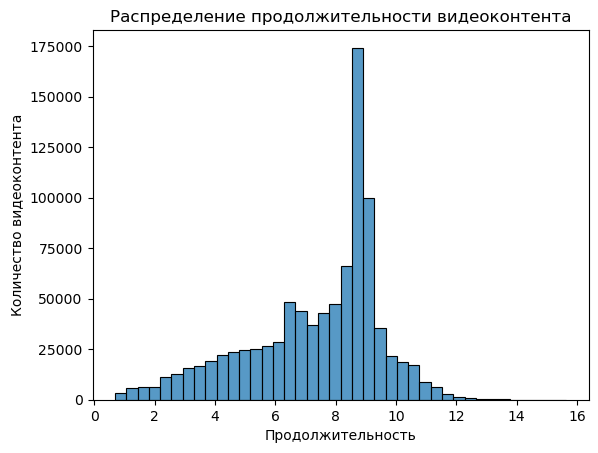

In [316]:
# Построим распределение после фильтрации признака total_dur
sns.histplot(data.total_dur_log, bins=40)
plt.title('Распределение продолжительности видеоконтента')
plt.xlabel('Продолжительность')
plt.ylabel('Количество видеоконтента')
plt.show()

**Вывод:**
- Гигантские аномальные значения превратились в небольшие числа.
- Удалось сохранить полезную информацию не прибегая к удалению экстремальных значений.
- Рапределение соответвует нормальному (отклонения несущественны), унимодальная, колоколообразная форма.

## Изучить процент просмотра контента пользователями.
**Цель:** Выявить диапазоны глубины просмотра видеоконтента пользователями.

In [317]:
data['watched_pct'].isna().sum()

np.int64(185)

In [318]:
data['watched_pct'].describe()

count   922782.00000
mean        49.69728
std         42.56039
min          0.00000
25%          5.00000
50%         41.00000
75%        100.00000
max        100.00000
Name: watched_pct, dtype: float64

Рассмотрев числовые характеристики можно сказать:
- Средний процент просмотра видео - **48%**;
- Стандартное отклонение равняется **42**;
- Медианное значение - **35%**

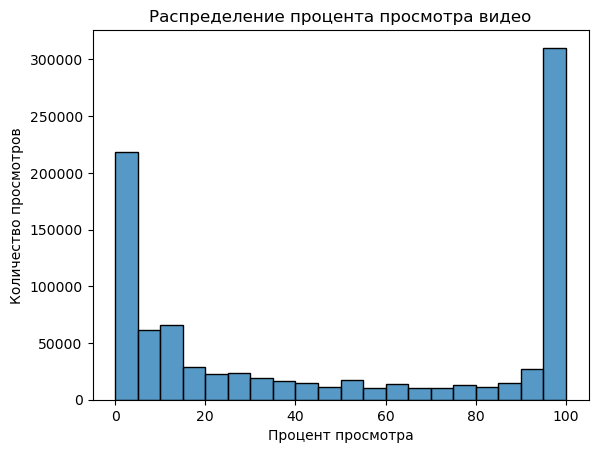

In [319]:
sns.histplot(data['watched_pct'], bins=20)
plt.title('Распределение процента просмотра видео')
plt.xlabel('Процент просмотра')
plt.ylabel('Количество просмотров')
plt.show()

In [320]:
# Рассмотрим процентные соотношение для диапазонов watched_pct = 100%/75%/50%
total_videos = data.watched_pct.shape[0]
watched_percent = (100, 75, 50)
for w_perc in watched_percent:
    full_watched_vid = data.query(f"watched_pct >= {w_perc}").shape[0]
    full_watched_vid_perc = full_watched_vid / total_videos
    print(f"Процент пользователей досматривающих видео до {w_perc} составляет {round(full_watched_vid_perc * 100, 2)}%")

Процент пользователей досматривающих видео до 100 составляет 29.11%
Процент пользователей досматривающих видео до 75 составляет 40.84%
Процент пользователей досматривающих видео до 50 составляет 47.64%


**Вывод:**
Рассмотрев числовые характеристики и распределение признака *watched_pct*, можно сказать:
- **29.1%** всех пользователей досматривают видеоконтент до конца.
- **40.84%** всех пользователей просматривают более 75% от продолжительности видеоконтента.
- **47.64%** всех пользователей просматривают более 50% от продолжительности видеоконтента.
- Большая часть пользователей не досматривает видео полностью, медиана составляет **41%**, что указывает на умеренный уровень вовлечённости.

# Глубокий анализ взаимодействий и контента

***В данном блоке ставятся цели рассмотреть следующие пункты***:
- Взаимосвязи между признаками.
- Совместное влияние нескольких признаков.
- Пользовательские паттерны.

In [321]:
data.head().T

,0,1,2,3,4
user_id,3,3,3,3,4
item_id,10139,7204,12928,3897,811
last_watch_dt,2021-04-25 00:00:00,2021-07-17 00:00:00,2021-08-17 00:00:00,2021-08-17 00:00:00,2021-06-12 00:00:00
total_dur,103.00000,28.00000,845.00000,901.00000,6191.00000
watched_pct,2.00000,1.00000,15.00000,15.00000,100.00000
age,age_35_44,age_35_44,age_35_44,age_35_44,Unknown
income,income_20_40,income_20_40,income_20_40,income_20_40,Unknown
sex,Ж,Ж,Ж,Ж,Unknown
kids_flg,1.00000,1.00000,1.00000,1.00000,Unknown
content_type,film,film,film,film,film


In [322]:
data.dtypes

user_id                          int64
item_id                          int64
last_watch_dt           datetime64[ns]
total_dur                      float64
watched_pct                    float64
age                             object
income                          object
sex                             object
kids_flg                        object
content_type                    object
title                           object
title_orig                      object
release_year                   float64
genres                          object
countries                       object
for_kids                        object
age_rating                     float64
studios                         object
directors                       object
actors                          object
keywords                        object
last_watch_timestamp           float64
total_dur_min                  float64
total_dur_hr                   float64
total_dur_log                  float64
dtype: object

In [323]:
# Для базового корреляционного анализа уберем текст/сложные списки и дублирующие признаки во избежании мультиколлинеарности.
corr_df = data[['last_watch_timestamp', 'total_dur', 'watched_pct', 'age', 'income', 'sex', 'kids_flg', 'content_type', 'release_year', 'for_kids', 'age_rating']]

In [324]:
corr_df.head().T

,0,1,2,3,4
last_watch_timestamp,1619308800.00000,1626480000.00000,1629158400.00000,1629158400.00000,1623456000.00000
total_dur,103.00000,28.00000,845.00000,901.00000,6191.00000
watched_pct,2.00000,1.00000,15.00000,15.00000,100.00000
age,age_35_44,age_35_44,age_35_44,age_35_44,Unknown
income,income_20_40,income_20_40,income_20_40,income_20_40,Unknown
sex,Ж,Ж,Ж,Ж,Unknown
kids_flg,1.00000,1.00000,1.00000,1.00000,Unknown
content_type,film,film,film,film,film
release_year,2016.00000,2023.00000,2021.00000,2021.00000,2023.00000
for_kids,Unknown,Unknown,Unknown,Unknown,Unknown


In [325]:
# Нам необходимо текстовые данные преобразовать в числовой формат, для этого возьмем словари для категориальных признаков
age_map = {
    'age_18_24': 21,
    'age_25_34': 30,
    'age_35_44': 40,
    'age_45_54': 50,
    'age_55_64': 60,
    'age_65_inf': 70,
    'Unknown': np.nan
}

income_map = {
    'income_0_20': 10,
    'income_20_40': 30,
    'income_40_60': 50,
    'income_90_150': 120,
    'income_150_inf' : 175,
    'Unknown': np.nan
}

sex_map = {
    'М': 1, 
    'Ж': 0, 
    'Unknown': np.nan 
}

kids_map = {
    1: 1, 
    0: 0, 
    'Unknown': 0
}

content_map = {
    'film' : 1,
    'series' : 0
}

In [326]:
corr_df['age'] = corr_df['age'].map(age_map)
corr_df['income'] = corr_df['income'].map(income_map)
corr_df['sex'] = corr_df['sex'].map(sex_map)
corr_df['kids_flg'] = corr_df['kids_flg'].map(kids_map)
corr_df['for_kids'] = corr_df['for_kids'].map(kids_map)
corr_df['content_type'] = corr_df['content_type'].map(content_map)

/tmp/ipykernel_590/2339975385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['age'] = corr_df['age'].map(age_map)
/tmp/ipykernel_590/2339975385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df['income'] = corr_df['income'].map(income_map)
/tmp/ipykernel_590/2339975385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [327]:
corr_df.head().T

,0,1,2,3,4
last_watch_timestamp,1619308800.00000,1626480000.00000,1629158400.00000,1629158400.00000,1623456000.00000
total_dur,103.00000,28.00000,845.00000,901.00000,6191.00000
watched_pct,2.00000,1.00000,15.00000,15.00000,100.00000
age,40.00000,40.00000,40.00000,40.00000,NaN
income,30.00000,30.00000,30.00000,30.00000,NaN
sex,0.00000,0.00000,0.00000,0.00000,NaN
kids_flg,1.00000,1.00000,1.00000,1.00000,0.00000
content_type,1.00000,1.00000,1.00000,1.00000,1.00000
release_year,2016.00000,2023.00000,2021.00000,2021.00000,2023.00000
for_kids,0.00000,0.00000,0.00000,0.00000,0.00000


<Axes: >

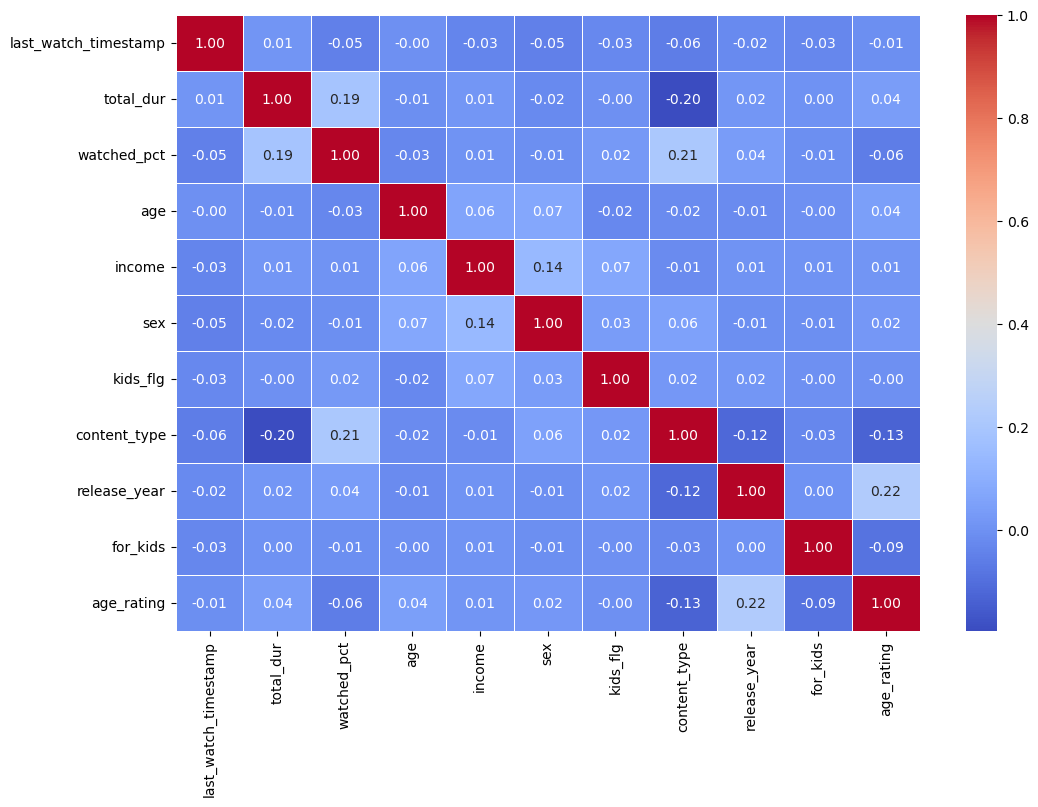

In [328]:
corr_matr = corr_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

**Вывод:**
- Наблюдается умеренная корреляция между целевым признаком и **total_dur** которая соответствует **0.19**, для более подробного анализа необходимо подробнее рассмотреть **total_dur**.
- Умеренная отрицательная корреляция между **content_type** и **total_dur**, что позволяет предположить о том, что продолжительность сериалов значительно меньше чем продолжительность фильмов.
- Также умеренная корреляция между **release_year** и **age_rating** и незначительная отрицательная корреляция между типом контента и годов выпуска/возрастной категорией.

### Рассмотрим total_dur подробнее
**Гипотеза:** признак **total_dur** имеет принципиально разную физическую природу для фильмов (длительность единицы контента) и сериалов (суммарная длительность сезона/всех серий), смешивание этих двух классов в одной матрице корреляции может искажать реальную картину, именно из-за этого может быть сложно точно интерпретировать уровень корреляции между признаком и таргетом.

Предполагается что **watched_pct** значительно различается в зависимости от типа контента:
- для фильма ожидается положительная связь (законченное произведение, выбор фильма может подразумевать интерес)
- для сериалов ожидается сложная связь (с одной стороны экстремальная длительность чем длиннее сериал, тем сложнее его досмотреть, с другой есть множество культовых сериалов, которые имеют огромную базу фанатов/лояльную аудиторию)

Text(0.5, 1.0, 'Корреляция сериалов')

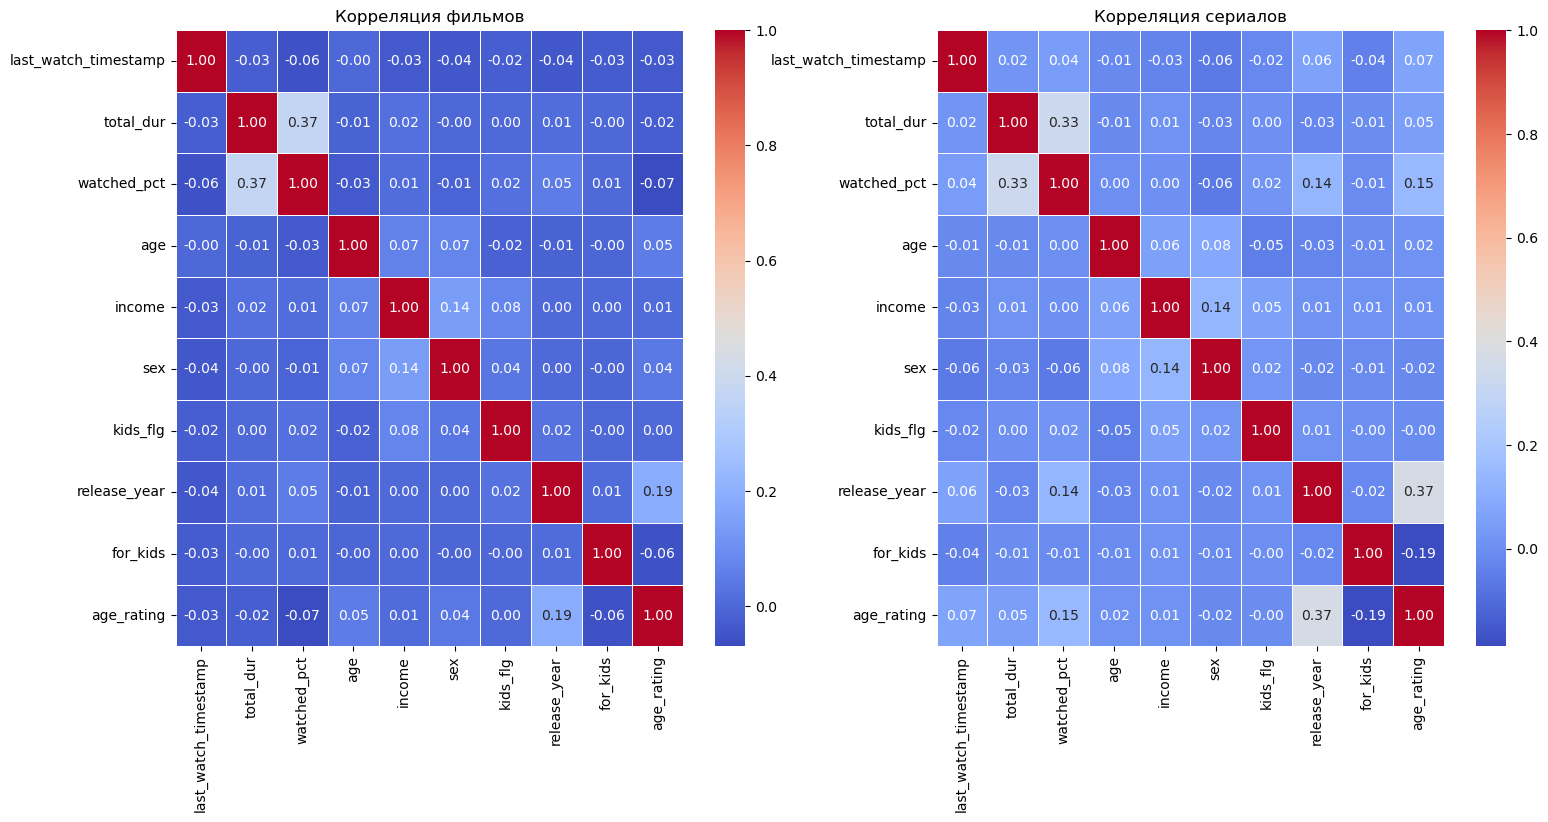

In [332]:
df_films = corr_df[corr_df['content_type'] == 1]
df_series = corr_df[corr_df['content_type'] == 0]

corr_films = df_films.drop('content_type', axis=1).corr()
corr_series = df_series.drop('content_type', axis=1).corr()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

sns.heatmap(corr_films, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[0])
axes[0].set_title('Корреляция фильмов')

sns.heatmap(corr_series, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=axes[1])
axes[1].set_title('Корреляция сериалов')

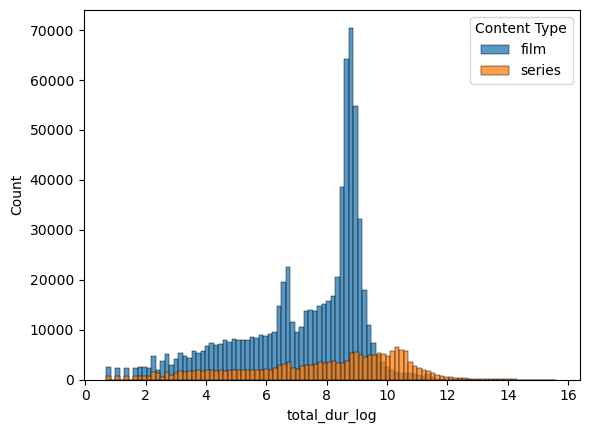

In [331]:
sns.histplot(data=data[data['content_type']=='film'], x='total_dur_log', bins=100, label='film')
sns.histplot(data=data[data['content_type']=='series'], x='total_dur_log', bins=100, label='series')
plt.legend(title='Content Type')
plt.show()

**Вывод**:
- У фильмов корреляция с таргетом **0.37** против общего в **0.19**, что подтверждает гипотезу: выбор фильма это осознанное решение, влияние остальных признаков в случае фильмов малозначимо.
- Для сериалов корреляция высока и составляет **0.33**, однако прослеживаются более сложные зависимости (длина сериала, плюс фан-база/лояльная аудитория). Также прослеживается корреляция таргета между годом выпуска (**0.15**) и возрастным рейтингом (**0.15**), что может говорить о целевой аудитории таких сериалов.

**Ключевые выводы:**
- Наибольшая корреляция целевой переменной прослеживается с признаком **content_type** в **0.21**. Данный признак является ключевым разделителем поведения пользователей, фильмы более предсказуемы, сериалы более требовательны к внешним признакам.
- Отсутствие корреляции между **age**, **sex**, **income** и таргетом, обсуловлено сложными нелинейными предпочтениями пользователей, что обосновывает отказ от использования линейных моделей, отдавая приоритет ансамблевым моделям.

# Data Preprocessing & Feature Engineering Pipeline
Реализовать функцию предобработки данных:
- Заполнить пропуски;
- Логарифмирование признака total_dur для нормализации распределения.
- Преобразование текстовых данных в числовой формат (age, income, sex, kids_flg/age, content type);
- Декомпозировать last_watch_dt на watch_hour, is_weekend;
- One-Hot-Encoding для топ-30 жанров/стран (покрывают 99.3% контента), остальное категория 'Other';
- Добавляем признак кол-во ключевых слов на контенте

In [97]:
def prepare_data(input_data, user_data, items_data):
    
    def select_top_one(cell):
        if pd.isna(cell):
            return 'Other'
        
        items = [x.strip() for x in cell.split(',')]
        popular_items = [item for item in items if item in top_items]
        if popular_items:
            return popular_items[0]
        else:
            return 'Other'

    data = input_data.merge(user_data, on='user_id', how='left').merge(items_data, on='item_id', how='left')

    data['total_dur_log'] = np.log1p(data['total_dur'])
    
    age_map = {
        'age_18_24': 21,
        'age_25_34': 30,
        'age_35_44': 40,
        'age_45_54': 50,
        'age_55_64': 60,
        'age_65_inf': 70,
        np.nan :  'Unknown'
    }
    
    income_map = {
        'income_0_20': 10,
        'income_20_40': 30,
        'income_40_60': 50,
        'income_90_150': 120,
        'income_150_inf' : 175,
        np.nan :  'Unknown'
    }
    
    sex_map = {
        'М': 1, 
        'Ж': 0, 
        np.nan:  'Unknown'
    }
    
    kids_map = {
        1: 1, 
        0: 0, 
        np.nan: 0
    }
    
    content_map = {
        'film' : 1,
        'series' : 0
    }

    maps = {
        'age': age_map,
        'income': income_map,
        'sex': sex_map,
        'kids_flg': kids_map,
        'for_kids': kids_map,
        'content_type': content_map
    }
    
    for column, mapping in maps.items():
        data[column] = data[column].map(mapping)

    data['last_watch_dt'] = pd.to_datetime(data['last_watch_dt'])
    data['watch_day_of_week'] = data['last_watch_dt'].dt.dayofweek
    data['is_weekend'] = data['last_watch_dt'].dt.weekday.isin([5, 6])

    columns = ['genres', 'countries']
    top_n = 30

    for column in columns:
        list_col = data[column].dropna().str.split(', ')
        all_items = list_col.explode()
        counts = all_items.value_counts()

        top_items = counts.head(top_n).index.tolist()
        data[column] = data[column].apply(select_top_one)

    data['keywords_count'] = data['keywords'].str.split(',').str.len()
    data['keywords_count'] = data['keywords_count'].fillna(0)
    
    data = data.drop(['last_watch_dt', 'user_id', 'item_id', 'title', 'title_orig', 'studios', 'directors', 'actors', 'keywords'], axis=1)
    data = data.fillna(0) 
    return pd.get_dummies(data, dtype=float)

In [7]:
data = prepare_data(data_train, data_users, data_items)

In [44]:
data.head(5)

,total_dur,watched_pct,kids_flg,content_type,release_year,for_kids,age_rating,total_dur_log,watch_day_of_week,is_weekend,...,countries_Country_000026,countries_Country_000027,countries_Country_000030,countries_Country_000031,countries_Country_000039,countries_Country_000041,countries_Country_000045,countries_Country_000052,countries_Country_000054,countries_Other
0,103.0,2.0,1,1,2016.0,0,16.0,4.644391,6,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,1.0,1,1,2023.0,0,16.0,3.367296,5,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,845.0,15.0,1,1,2021.0,0,16.0,6.740519,1,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,901.0,15.0,1,1,2021.0,0,16.0,6.804615,1,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6191.0,100.0,0,1,2023.0,0,16.0,8.731013,5,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

## Baseline (LogReg)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
X = data.drop('watched_pct', axis=1)
y = data['watched_pct']

In [10]:
model = LogisticRegression(class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
y_test_flag = (y_test > 50).astype(int)

In [12]:
model.fit(X_train, y_train)

/home/grishn/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [68]:
y_pred = model.predict(X_test)
y_pred_flag = (y_pred > 50).astype(int)

In [69]:
accuracy = accuracy_score(y_test_flag, y_pred_flag)
accuracy

0.9606231785489003

In [70]:
pd.DataFrame(classification_report(y_test_flag, y_pred_flag, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.968810,0.957087,0.962913,151563.000000
1,0.951478,0.964677,0.958032,132208.000000
accuracy,0.960623,0.960623,0.960623,0.960623
macro avg,0.960144,0.960882,0.960472,283771.000000
weighted avg,0.960735,0.960623,0.960639,283771.000000


**Вывод по базовой модели:**
- Базовая модель в случае бинаризации целевого признака, показывает неплохие результаты, F-macro 0.76, в целом мы уже можем корректно определять досмотрит пользователь медиаконтент или нет.

## Main

In [84]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score, classification_report

### XGBoost Classifier

In [11]:
X = data.drop('watched_pct', axis=1)
y = data['watched_pct']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [62]:
y_test_flag = (y_test > 50).astype(int)

In [10]:
model = xgb.XGBClassifier(n_estimators=100,
                          max_depth=6,
                          learning_rate=0.1,
                          random_state=42)

In [13]:
model.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [63]:
y_test_pred = model.predict(X_test)

In [64]:
y_pred_test_flag = (y_test_pred > 50).astype(int)

In [66]:
pd.DataFrame(classification_report(y_test_flag, y_pred_test_flag, output_dict=True)).transpose()

,precision,recall,f1-score,support
0,0.968810,0.957087,0.962913,151563.000000
1,0.951478,0.964677,0.958032,132208.000000
accuracy,0.960623,0.960623,0.960623,0.960623
macro avg,0.960144,0.960882,0.960472,283771.000000
weighted avg,0.960735,0.960623,0.960639,283771.000000


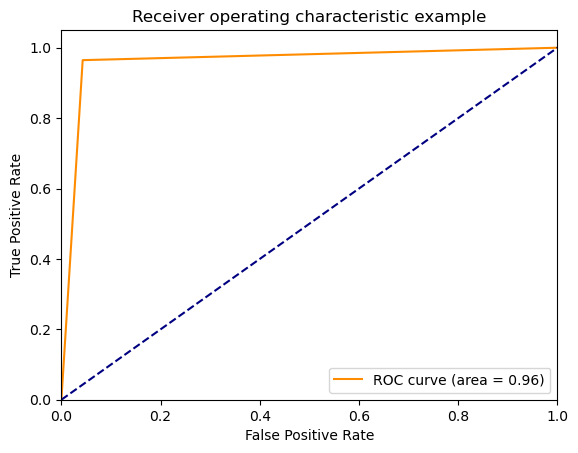

In [21]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_flag, y_pred_test_flag)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [65]:
pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose()

,precision,recall,f1-score,support
0.0,0.941037,0.966230,0.953467,33580.000000
1.0,0.848644,0.880742,0.864395,14171.000000
2.0,0.729629,0.765813,0.747284,8711.000000
3.0,0.650837,0.653858,0.652344,6246.000000
4.0,0.543883,0.570120,0.556693,4913.000000
...,...,...,...,...
99.0,0.462222,0.053034,0.095151,1961.000000
100.0,0.728496,0.980370,0.835871,81965.000000
accuracy,0.601513,0.601513,0.601513,0.601513
macro avg,0.274411,0.192406,0.207273,283771.000000


**Вывод по XGBoost classifier:**
- Что касает задачи классификации бинарного признака, то XGBoost справился отлично, f-macro **0.96**, ROC - **0.96**.
- Но в случае если мы хотим получать значение которое будет соответсвовать процентному соотношению в интервале от 0 до 100, то классификатор интерпретирует ошибку в 95 и 96, аналогично ошибке в 0 и 100, хотя на самом деле, в нашем случае 95 и 96 не отличались бы друг от друга как и 100, поэтому принятно решение построить регрессионую модель.

### XGBoost Regressor

In [23]:
regr_model = xgb.XGBRegressor(n_estimators=100,
                          max_depth=6,
                          learning_rate=0.1,
                          random_state=42)

In [28]:
regr_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [54]:
y_pred_reg = regr_model.predict(X_test)
y_pred_reg = np.clip(y_pred_reg, 0, 100)
y_pred_rounded = np.round(y_pred_reg)

In [55]:
print(f"MAE: {mean_absolute_error(y_test, y_pred_rounded):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rounded):.2f}")

MAE: 4.57
R2 Score: 0.95


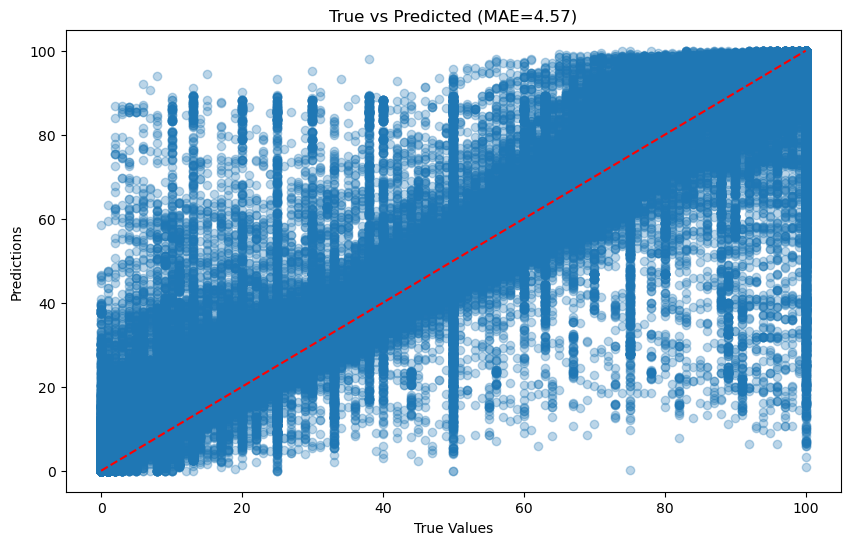

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.3)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True vs Predicted (MAE={mean_absolute_error(y_test, y_pred_rounded):.2f})')
plt.show()

**Вывод по XGBoost Regressor:**
- Регрессионая модель показывает себя объективно лучше классификатора, коэффициент детерминации равен 0.96, а MAE +-4.57, что не так критично в нашем случае, такая погрешность вполне допустима.

### Вклад признаков

In [58]:
feature_importances = regr_model.feature_importances_

In [59]:
feature_importances_df = pd.DataFrame(
    {
        "features" : list(X_train),
        "feature_importances" : feature_importances
    }
)

In [61]:
feature_importances_df.sort_values("feature_importances", ascending=False).head(20)

,features,feature_importances
0,total_dur,0.369703
2,content_type,0.242492
65,countries_Country_000010,0.032092
45,genres_Genre_000032,0.030294
58,countries_Country_000001,0.028903
47,genres_Genre_000034,0.019440
29,genres_Genre_000003,0.017032
31,genres_Genre_000005,0.016230
68,countries_Country_000013,0.015875
63,countries_Country_000007,0.013874


**Вывод:**
- Можно уверенно заявить что продолжительность контента, а также его тип, вносят самый существенный вклад в вероятность досмотреть его до конца, также немаловажную роль играет страна производства и жанр контента.

---

# Тестовый датасет

In [71]:
data_test

,user_id,item_id,last_watch_dt,total_dur
0,1,5938,2021-06-20,23721.0
1,2,11312,2021-08-14,8442.0
2,3,9353,2021-08-21,28.0
3,9,15391,2021-08-19,7331.0
4,12,7727,2021-08-04,7827.0
...,...,...,...,...
100572,958922,6109,2021-08-13,100.0
100573,958972,12085,2021-08-20,1820.0
100574,958975,9964,2021-06-08,8517.0
100575,958980,6109,2021-07-16,35541.0


In [85]:
model_columns = X_train.columns

In [98]:
final_data = prepare_data(data_test, data_users, data_items)

In [99]:
final_data_aligned = final_data.reindex(columns=model_columns, fill_value=0)

In [101]:
fin_pred = regr_model.predict(final_data_aligned)

In [111]:
fin_pred = np.clip(fin_pred, 0, 100)
fin_pred_rounded = np.round(fin_pred)

In [112]:
data_test['watched_pct'] = fin_pred_flag

In [113]:
data_test.to_csv('../data/result_predictions.csv')